Dated: 30-3-18

CNN Tutorial with adam and using Data Augmentation

Dataset-- MNIST

In this tutorial, i am going to show simple CNN network working  with data augmentation and matplot display for images

Data Augmentation is done for the purpose of creating dataset(mainly images more variety)...

It can helpful for creating a dataset with much more richer images

The model is trained on small amt of data only....

Installing Dependencies

In [2]:
import keras.backend as K
K._backend='tensorflow' if K.backend() else print("Requires no change in backend")

In [3]:
#Basic Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(124) #for reproducibility purpose

In [4]:
#Installing Main Libraries
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


In [5]:
#Creating Training and Testing data
(trainX,trainY),(testX,testY)=mnist.load_data()


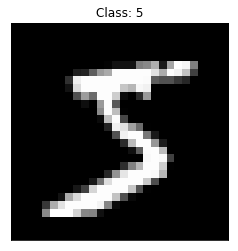

(28, 28)


In [6]:
#Showing Mnist Image of 5 digit
plt.imshow(trainX[0],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Class: "+str(trainY[0]))
plt.show()
print(trainX[0].shape)

In [7]:
#Preprocessing Input Data i.e X
trainX=trainX.reshape(trainX.shape[0],28,28,1)
testX=testX.reshape(testX.shape[0],28,28,1)
print(trainX.shape)


trainX=trainX.astype('float32')
testX=testX.astype('float32')
trainX/=255
testX/=255

print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [8]:
#Preprocessing Output label i.e. Y
num_class=10
print(trainY.shape)
trainY=np_utils.to_categorical(trainY,num_class)
testY=np_utils.to_categorical(testY,num_class)
print(trainY.shape,testY.shape)


(60000,)
(60000, 10) (10000, 10)


### Creating Convolution Architecture
# 1.Convolution
# 2.Pooling
# 3.Dropout
Repeat step 1,2,3 to add more convolution layers in network

# 4.Fully Connected layer
Repeat to add more feed forward layers

# 5.Flatten
# 6.Classify Sample

Creating Architecture for CNN Model

In [10]:
#Model Creation phase
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Creating Fully Connected Network
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Dense(256))
BatchNormalization(axis=-1)
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#compilation phase
#finding loss and backpropagating
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 10, 10, 64)        0         
__________

In [12]:
#Data Augmentation for creating rich datset
traingen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08) #for training data augmentation ....properties are defined

testgen=ImageDataGenerator()  #for test data we don't need anytype of augmentation

In [13]:
#defining Genrator training phase
train_generator=traingen.flow(trainX,trainY,batch_size=64)
test_generator=testgen.flow(testX,testY,batch_size=64)


# Training Phase

In [16]:

data=model.fit_generator(train_generator,steps_per_epoch=60000//200,
                   epochs=3,validation_data=test_generator,validation_steps=10000//200)

Epoch 1/3
300/300 [==============================] - 220s 735ms/step - loss: 0.0590 - acc: 0.9825 - val_loss: 0.0218 - val_acc: 0.9922
Epoch 2/3
300/300 [==============================] - 165s 549ms/step - loss: 0.0621 - acc: 0.9827 - val_loss: 0.0303 - val_acc: 0.9903
Epoch 3/3
300/300 [==============================] - 116s 388ms/step - loss: 0.0574 - acc: 0.9835 - val_loss: 0.0373 - val_acc: 0.9900


In [17]:
#Prediciting Accuracy
score=model.evaluate(testX,testY)
print("Loss: {0} \t Accuracy: {1}%".format(round(score[0],5),round(score[1],3)*100))

10000/10000 [==============================] - 17s 2ms/step
Loss: 0.0422 	 Accuracy: 98.7%
